In [1]:
%pip install matplotlib pandas numpy seaborn wordcloud

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 455.4/455.4 kB 1.3 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
raw_df = pd.read_csv('anhdadenchuanmen.csv')

In [4]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 51 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   post_id                        99 non-null     int64  
 1   text                           99 non-null     object 
 2   post_text                      99 non-null     object 
 3   shared_text                    0 non-null      float64
 4   original_text                  0 non-null      float64
 5   time                           99 non-null     object 
 6   timestamp                      99 non-null     int64  
 7   image                          22 non-null     object 
 8   image_lowquality               99 non-null     object 
 9   images                         99 non-null     object 
 10  images_description             99 non-null     object 
 11  images_lowquality              99 non-null     object 
 12  images_lowquality_description  99 non-null     objec

In [5]:
raw_df.describe()

,post_id,shared_text,original_text,timestamp,video_duration_seconds,video_height,video_id,video_quality,video_size_MB,video_watches,...,factcheck,shared_post_id,shared_time,shared_user_id,shared_username,shared_post_url,reaction_count,page_id,sharers,image_id
count,9.900000e+01,0.0,0.0,9.900000e+01,0.0,0.0,7.600000e+01,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,99.000000,9.900000e+01,0.0,2.200000e+01
mean,8.892589e+14,NaN,NaN,1.699529e+09,NaN,NaN,1.193751e+15,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1582.636364,2.035750e+15,NaN,8.889168e+14
std,2.910130e+12,NaN,NaN,5.025057e+05,NaN,NaN,1.454206e+15,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,3750.019631,2.512723e-01,NaN,3.165685e+12
min,8.829047e+14,NaN,NaN,1.698674e+09,NaN,NaN,1.622029e+14,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,2.035750e+15,NaN,8.829046e+14
25%,8.869146e+14,NaN,NaN,1.699094e+09,NaN,NaN,3.145517e+14,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,2.035750e+15,NaN,8.859658e+14
50%,8.894326e+14,NaN,NaN,1.699531e+09,NaN,NaN,7.183731e+14,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,2.035750e+15,NaN,8.894343e+14
75%,8.918382e+14,NaN,NaN,1.699943e+09,NaN,NaN,1.407314e+15,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1589.500000,2.035750e+15,NaN,8.894445e+14
max,8.942968e+14,NaN,NaN,1.700381e+09,NaN,NaN,7.234739e+15,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,28382.000000,2.035750e+15,NaN,8.942968e+14


In [6]:
#Drop columns that are null
raw_df.dropna(axis= 'columns', how= 'all', inplace= True)
raw_df

,post_id,text,post_text,time,timestamp,image,image_lowquality,images,images_description,images_lowquality,...,reactors,w3_fb_url,reactions,reaction_count,with,page_id,image_id,image_ids,was_live,fetched_time
0,894280255390301,Tên đẹp mà nhỉ\n#anhdaden,Tên đẹp mà nhỉ\n#anhdaden,2023-11-19 15:00:58,1700380858,https://m.facebook.com/photo/view_full_size/?f...,https://scontent.fhan14-3.fna.fbcdn.net/v/t39....,['https://m.facebook.com/photo/view_full_size/...,"[""Có thể là hình minh họa về văn bản cho biết ...",['https://scontent.fhan14-3.fna.fbcdn.net/v/t3...,...,"[{'name': 'Văn Tú', 'link': 'https://facebook....",https://www.facebook.com/anhdadenchuanmen/post...,"{'thích': 1081, 'yêu thích': 2, 'haha': 1170, ...",2280,NaN,2035749833398248,8.942802e+14,['894280238723636'],False,2023-11-22 20:43:51.887107
1,893838748767785,Ảo ma\n#anhdaden,Ảo ma\n#anhdaden,2023-11-19 11:00:31,1700366431,NaN,https://scontent.fhan14-1.fna.fbcdn.net/v/t15....,[],[],['https://scontent.fhan14-1.fna.fbcdn.net/v/t1...,...,"[{'name': 'Văn Tú', 'link': 'https://facebook....",https://www.facebook.com/anhdadenchuanmen/post...,"{'thích': 767, 'yêu thích': 2, 'haha': 755, 'w...",1547,NaN,2035749833398248,NaN,[],False,2023-11-22 20:43:58.689643
2,893837865434540,Sau này khỏi cần đi sở thú\n#anhdaden,Sau này khỏi cần đi sở thú\n#anhdaden,2023-11-18 21:00:17,1700316017,NaN,https://scontent.fhan14-1.fna.fbcdn.net/v/t15....,[],[],['https://scontent.fhan14-1.fna.fbcdn.net/v/t1...,...,"[{'name': 'Minh Trung', 'link': 'https://faceb...",https://www.facebook.com/anhdadenchuanmen/post...,"{'thích': 907, 'yêu thích': 3, 'haha': 1223, '...",2164,NaN,2035749833398248,NaN,[],False,2023-11-22 20:44:06.128719
3,894278962057097,Hơi cấn rồi đó,Hơi cấn rồi đó,2023-11-18 20:00:56,1700312456,https://scontent.fhan14-1.fna.fbcdn.net/v/t39....,https://scontent.fhan14-1.fna.fbcdn.net/v/t39....,['https://scontent.fhan14-1.fna.fbcdn.net/v/t3...,"[""Có thể là hình vẽ ngẫu hứng về văn bản cho b...",['https://scontent.fhan14-1.fna.fbcdn.net/v/t3...,...,"[{'name': 'Huyen Anh', 'link': 'https://facebo...",https://www.facebook.com/anhdadenchuanmen/post...,"{'thích': 1185, 'yêu thích': 4, 'haha': 1036, ...",2277,NaN,2035749833398248,8.942789e+14,['894278938723766'],False,2023-11-22 20:44:14.961845
4,893836152101378,Vừa ăn cóp vừa la làng\n#anhdaden,Vừa ăn cóp vừa la làng\n#anhdaden,2023-11-18 19:00:43,1700308843,NaN,https://scontent.fhan14-4.fna.fbcdn.net/v/t15....,[],[],['https://scontent.fhan14-4.fna.fbcdn.net/v/t1...,...,"[{'name': 'Đỗ Trọng Nguyên', 'link': 'https://...",https://www.facebook.com/anhdadenchuanmen/post...,"{'thích': 859, 'yêu thích': 3, 'haha': 1396, '...",2277,NaN,2035749833398248,NaN,[],False,2023-11-22 20:44:36.246296
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,884955812989412,Đúng là đỉnh của đỉnh\n#anhdaden,Đúng là đỉnh của đỉnh\n#anhdaden,2023-10-31 16:00:19,1698742819,NaN,https://scontent.fhan14-3.fna.fbcdn.net/v/t15....,[],[],['https://scontent.fhan14-3.fna.fbcdn.net/v/t1...,...,NaN,NaN,NaN,0,NaN,2035749833398248,NaN,[],False,NaN
95,884900159661644,Tới công chuyện\n#anhdaden,Tới công chuyện\n#anhdaden,2023-10-31 11:00:43,1698724843,NaN,https://scontent.fhan14-4.fna.fbcdn.net/v/t15....,[],[],['https://scontent.fhan14-4.fna.fbcdn.net/v/t1...,...,NaN,NaN,NaN,0,NaN,2035749833398248,NaN,[],False,NaN
96,882904736527853,Chơi ẩu rồi đó mấy ba\n#anhdaden,Chơi ẩu rồi đó mấy ba\n#anhdaden,2023-10-31 09:00:02,1698717602,https://scontent.fhan14-4.fna.fbcdn.net/v/t39....,https://scontent.fhan14-4.fna.fbcdn.net/v/t39....,['https://scontent.fhan14-4.fna.fbcdn.net/v/t3...,"[""Có thể là hình ảnh về 2 người và văn bản cho...",['https://scontent.fhan14-4.fna.fbcdn.net/v/t3...,...,NaN,NaN,NaN,0,NaN,2035749833398248,8.829046e+14,['882904649861195'],False,NaN
97,884960556322271,Ngon ngon ngon nút ná.c.k,Ngon ngon ngon nút ná.c.k,2023-10-30 22:00:21,1698678021,NaN,https://scontent.fhan14-2.fna.fbcdn.net/v/t15....,[],[],['https://scontent.fhan14-

In [7]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 35 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   post_id                        99 non-null     int64  
 1   text                           99 non-null     object 
 2   post_text                      99 non-null     object 
 3   time                           99 non-null     object 
 4   timestamp                      99 non-null     int64  
 5   image                          22 non-null     object 
 6   image_lowquality               99 non-null     object 
 7   images                         99 non-null     object 
 8   images_description             99 non-null     object 
 9   images_lowquality              99 non-null     object 
 10  images_lowquality_description  99 non-null     object 
 11  video                          76 non-null     object 
 12  video_id                       76 non-null     float

In [8]:
#Drop columns that are duplicated too much
for c in raw_df.columns:
    duplicated_number = raw_df[c].duplicated().sum()
    print('{} : {}'. format(c, duplicated_number))

post_id : 0
text : 4
post_text : 4
time : 0
timestamp : 0
image : 76
image_lowquality : 0
images : 76
images_description : 77
images_lowquality : 0
images_lowquality_description : 76
video : 22
video_id : 22
video_thumbnail : 22
likes : 97
comments : 68
shares : 75
post_url : 0
links : 0
user_id : 98
username : 98
user_url : 0
is_live : 98
available : 98
comments_full : 67
reactors : 68
w3_fb_url : 67
reactions : 67
reaction_count : 68
with : 97
page_id : 98
image_id : 76
image_ids : 76
was_live : 98
fetched_time : 67


In [9]:
for c in raw_df.columns:
    duplicated_number = raw_df[c].duplicated().sum()
    if duplicated_number > 90:
        raw_df.drop(columns= c, inplace= True)

In [10]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 27 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   post_id                        99 non-null     int64  
 1   text                           99 non-null     object 
 2   post_text                      99 non-null     object 
 3   time                           99 non-null     object 
 4   timestamp                      99 non-null     int64  
 5   image                          22 non-null     object 
 6   image_lowquality               99 non-null     object 
 7   images                         99 non-null     object 
 8   images_description             99 non-null     object 
 9   images_lowquality              99 non-null     object 
 10  images_lowquality_description  99 non-null     object 
 11  video                          76 non-null     object 
 12  video_id                       76 non-null     float

In [11]:
#Bài viết mới nhất
first_row = raw_df.iloc[0]
reactions = dict(eval(first_row['reactions']))
reactions["shares"] = first_row['shares']
reactions["comments"] = first_row['comments']
reactions

{'thích': 1081,
 'yêu thích': 2,
 'haha': 1170,
 'wow': 3,
 'thương thương': 2,
 'buồn': 22,
 'shares': 7,
 'comments': 7}

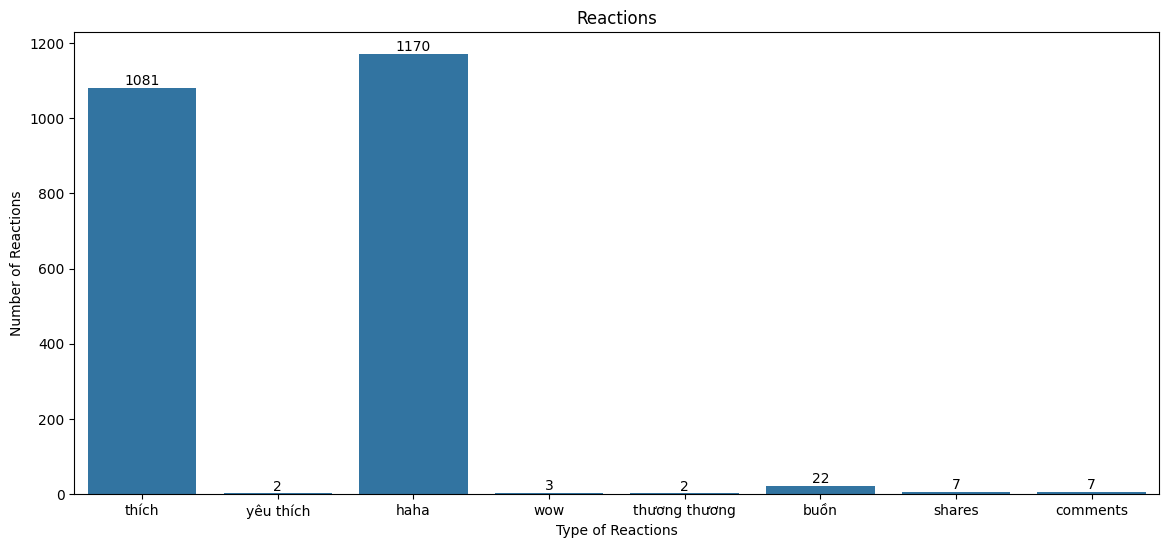

In [12]:
reactions = dict(eval(first_row['reactions']))
reactions["shares"] = first_row['shares']
reactions["comments"] = first_row['comments']
plt.figure(figsize=(14,6))
ax = sns.barplot(
    x=list(reactions.keys()), 
    y=list(reactions.values())
)
plt.bar_label(ax.containers[0])
plt.title('Reactions')
plt.xlabel('Type of Reactions')
plt.ylabel('Number of Reactions')
plt.show()

In [13]:
#Bài viết có lượt tương tác cao nhất
Max_reactions = raw_df[raw_df['reaction_count'] == raw_df['reaction_count'].max()]
Max_reactions

,post_id,text,post_text,time,timestamp,image,image_lowquality,images,images_description,images_lowquality,...,links,user_url,comments_full,reactors,w3_fb_url,reactions,reaction_count,image_id,image_ids,fetched_time
26,889441425874184,Đứng nhìn thôi chứ biết sao giờ\n#anhdaden,Đứng nhìn thôi chứ biết sao giờ\n#anhdaden,2023-11-14 09:00:05,1699927205,https://m.facebook.com/photo/view_full_size/?f...,https://scontent.fhan14-4.fna.fbcdn.net/v/t39....,['https://m.facebook.com/photo/view_full_size/...,"[""Có thể là hình ảnh về 12 người và văn bản ch...",['https://scontent.fhan14-4.fna.fbcdn.net/v/t3...,...,[{'link': '/hashtag/anhdaden?_ft_=encrypted_tr...,https://facebook.com/anhdadenchuanmen?eav=Afaq...,"[{'comment_id': '362614069562005', 'comment_ur...","[{'name': 'Hà Văn Hùng', 'link': 'https://face...",https://www.facebook.com/anhdadenchuanmen/post...,"{'thích': 10342, 'yêu thích': 41, 'haha': 1765...",28382,8.894411e+14,['889441095874217'],2023-11-22 20:50:15.926794


In [14]:
Maxreact = raw_df.iloc[26]
reactions = dict(eval(Maxreact['reactions']))
reactions["shares"] = Maxreact['shares']
reactions["comments"] = Maxreact['comments']
reactions

{'thích': 10342,
 'yêu thích': 41,
 'haha': 17653,
 'wow': 47,
 'thương thương': 25,
 'buồn': 273,
 'phẫn nộ': 1,
 'shares': 192,
 'comments': 772}

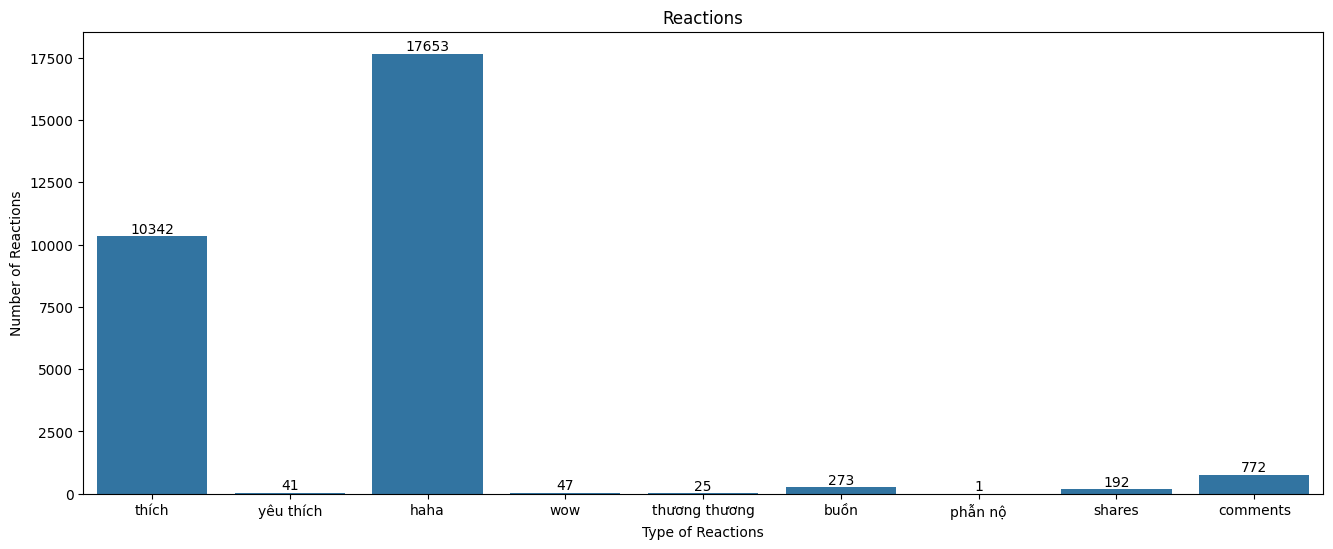

In [15]:
Maxreact = raw_df.iloc[26]
reactions = dict(eval(Maxreact['reactions']))
reactions["shares"] = Maxreact['shares']
reactions["comments"] = Maxreact['comments']
plt.figure(figsize=(16,6))
ax = sns.barplot(
    x=list(reactions.keys()), 
    y=list(reactions.values())
)
plt.bar_label(ax.containers[0])
plt.title('Reactions')
plt.xlabel('Type of Reactions')
plt.ylabel('Number of Reactions')
plt.show()

In [34]:

raw_df['time'] = pd.to_datetime(raw_df['time'])
raw_df['hour'] = raw_df['time'].dt.hour

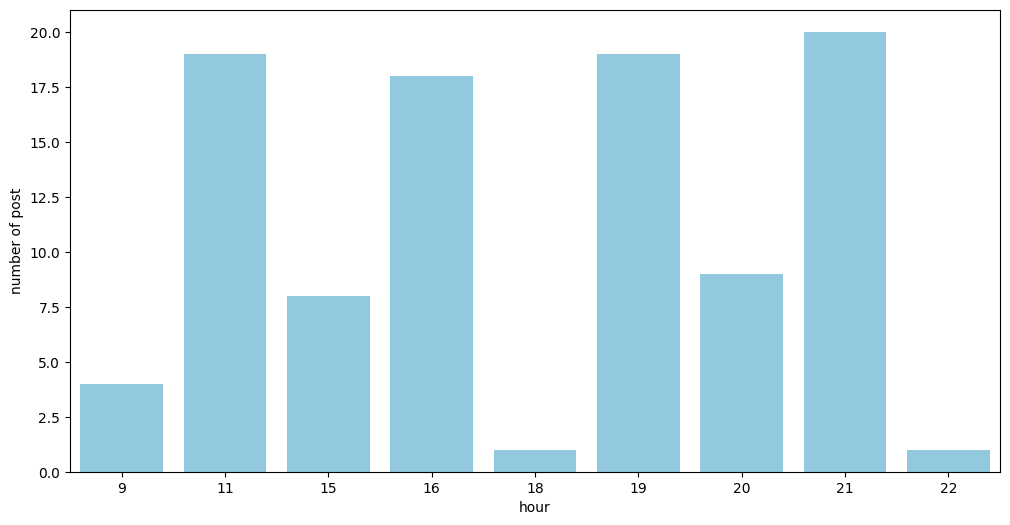

In [38]:
#thời gian mà Fanpage thường xuyên đăng bài trong ngày 
plt.figure(figsize=(12, 6))
sns.countplot(x='hour', data=raw_df,color='skyblue')
plt.xlabel('hour')
plt.ylabel('number of post')
plt.show()

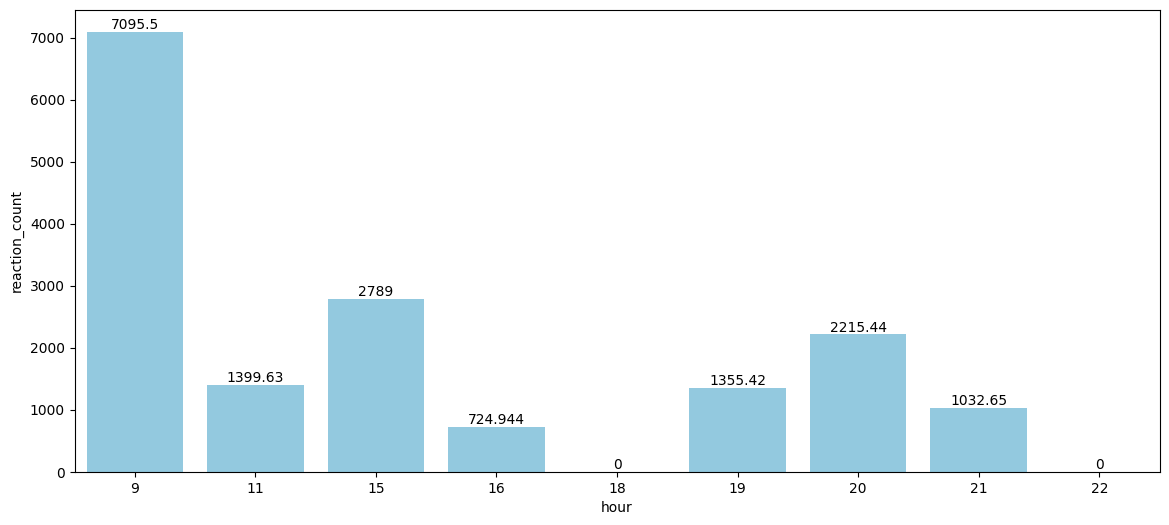

In [45]:
#Lượt tương tác trung bình theo mốc thời gian đăng bài
reaction_mean = raw_df.groupby('hour')['reaction_count'].mean().reset_index()
plt.figure(figsize=(14,6))
ax1 = sns.barplot(
    data= reaction_mean,
    x = 'hour',
    y = 'reaction_count',
    color='skyblue'
)
plt.bar_label(ax1.containers[0])
plt.show()

In [19]:
df_text = raw_df[['post_id','post_text']]
text    = str(df_text['post_text'])
df_text

,post_id,post_text
0,894280255390301,Tên đẹp mà nhỉ\n#anhdaden
1,893838748767785,Ảo ma\n#anhdaden
2,893837865434540,Sau này khỏi cần đi sở thú\n#anhdaden
3,894278962057097,Hơi cấn rồi đó
4,893836152101378,Vừa ăn cóp vừa la làng\n#anhdaden
...,...,...
94,884955812989412,Đúng là đỉnh của đỉnh\n#anhdaden
95,884900159661644,Tới công chuyện\n#anhdaden
96,882904736527853,Chơi ẩu rồi đó mấy ba\n#anhdaden
97,884960556322271,Ngon ngon ngon nút ná.c.k


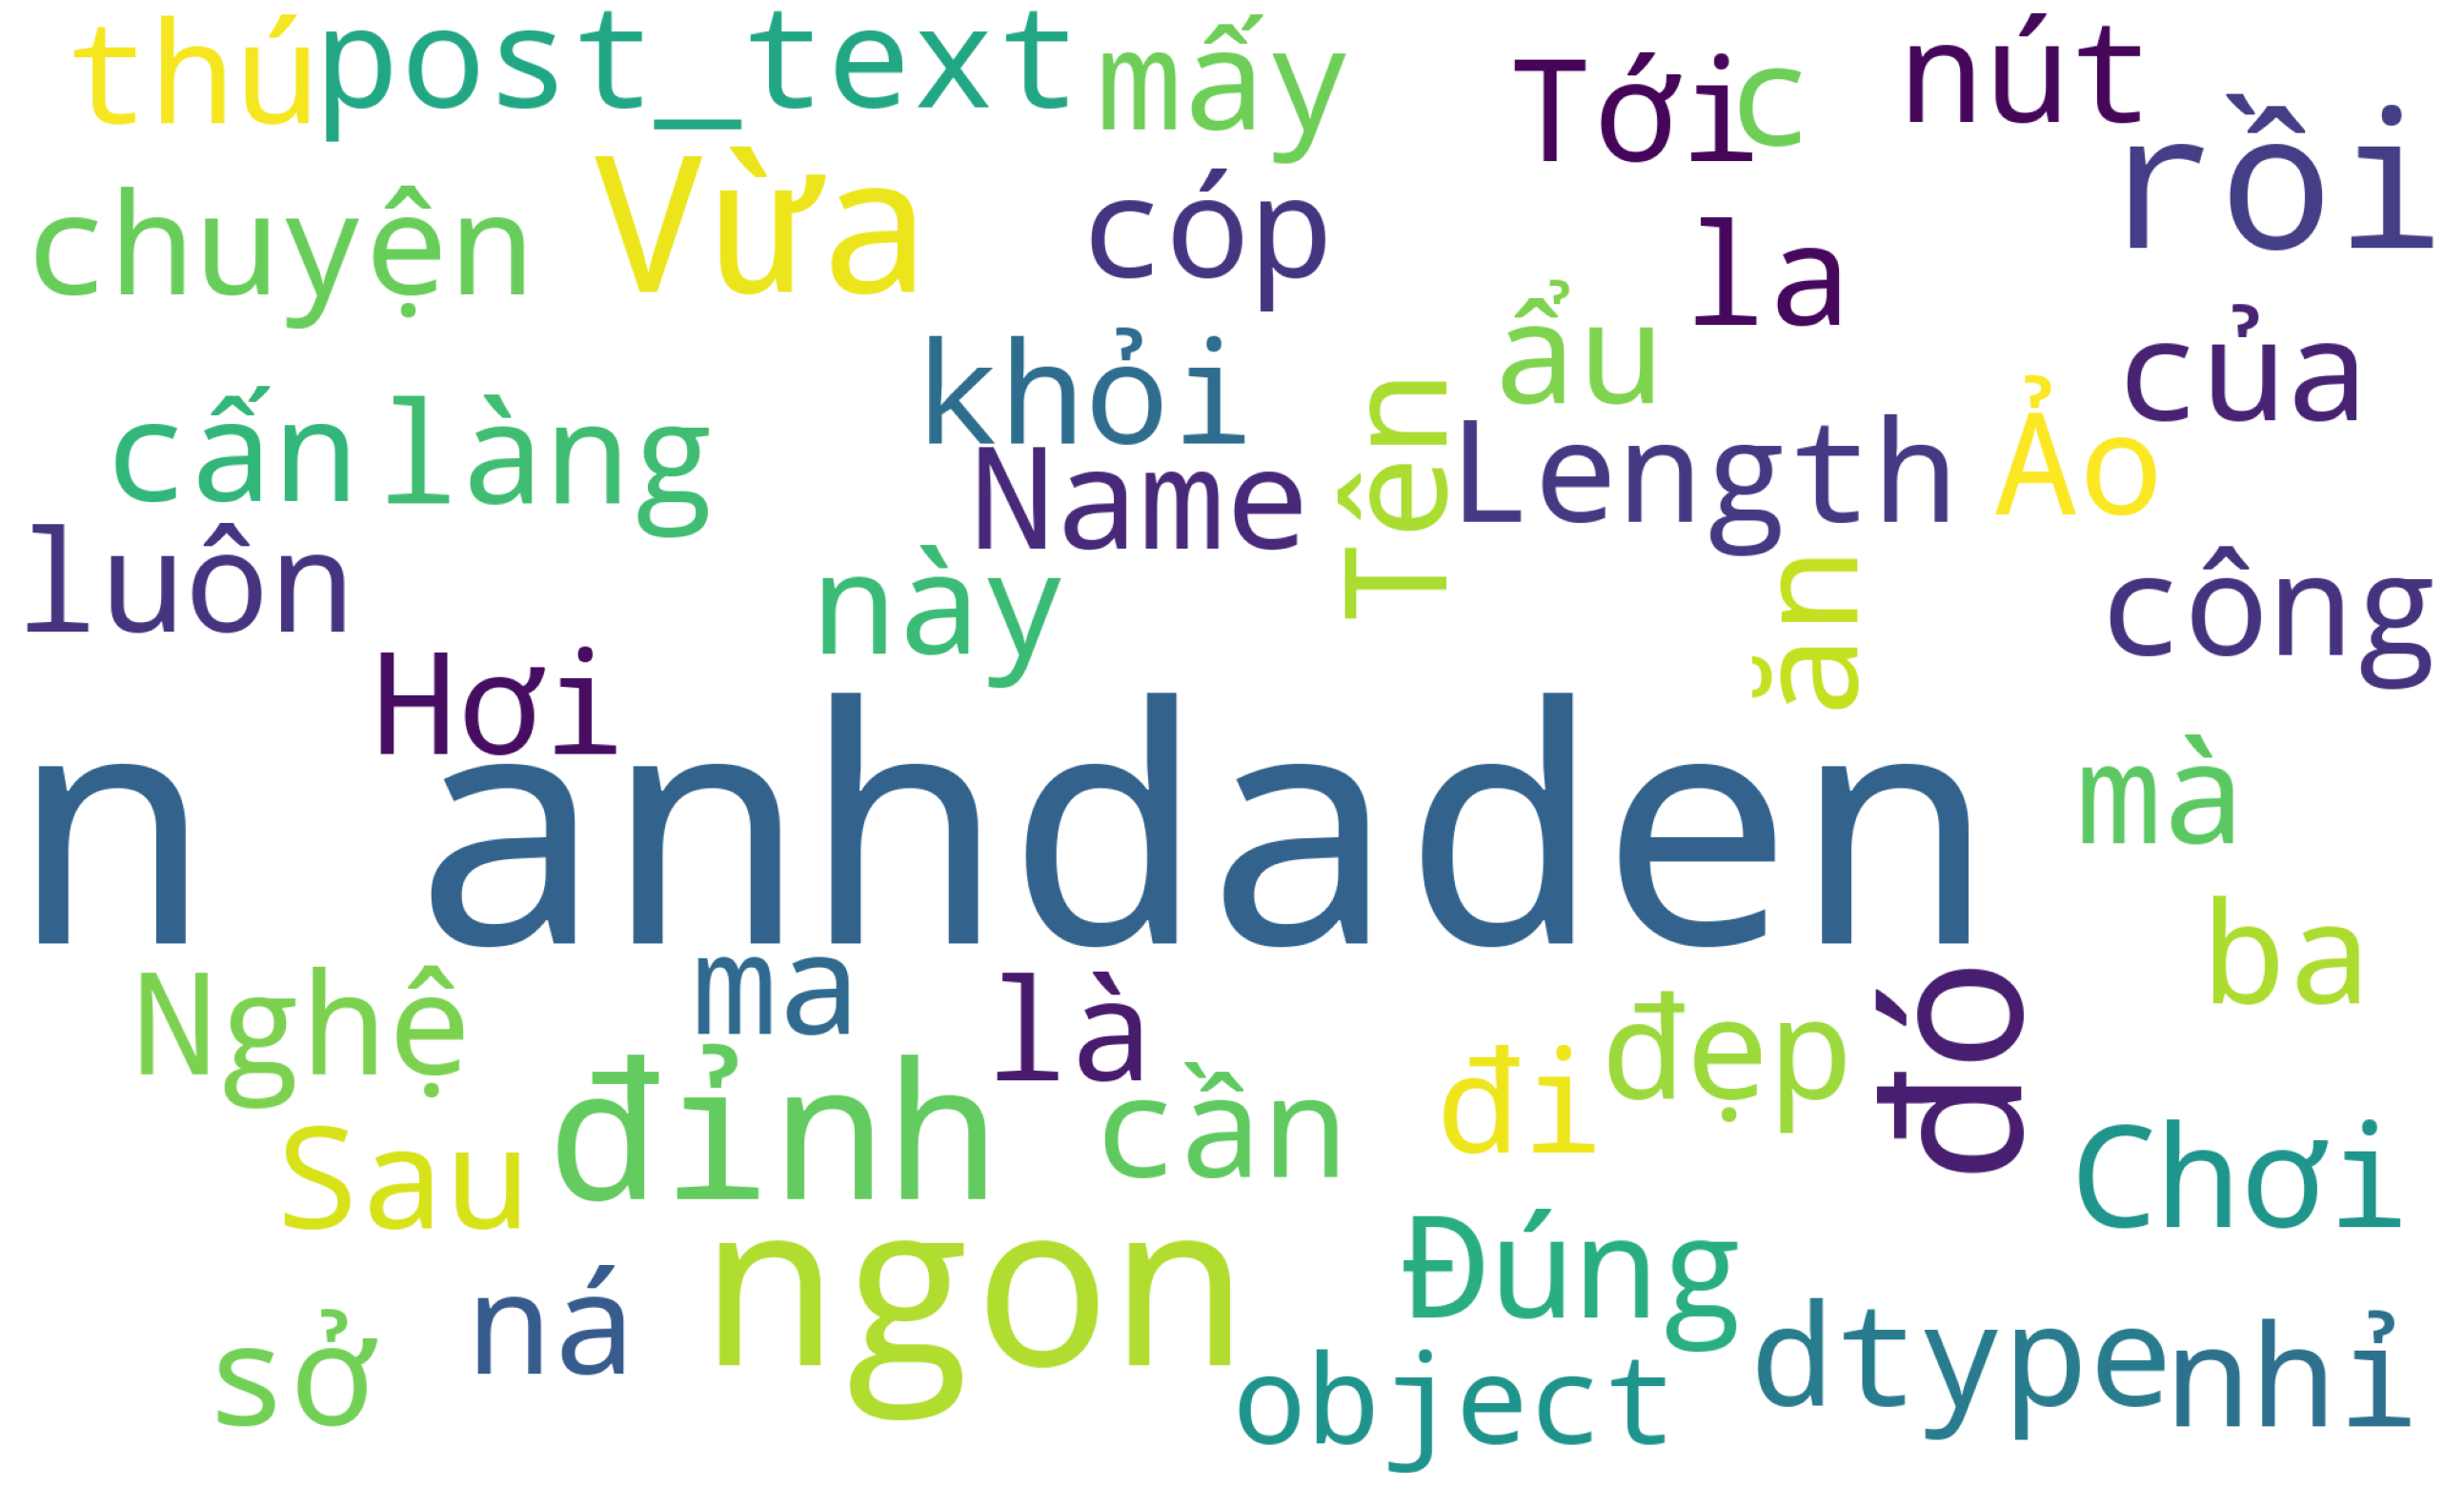

In [20]:
#Các từ khóa xuất hiện nhiều
from wordcloud import WordCloud, STOPWORDS

wordcloud = WordCloud(stopwords=STOPWORDS,
                          background_color='white', 
                      max_words=300,
                      width=2000, height=1200
                         ).generate(text)
plt.figure(figsize=(40,20))
plt.clf()
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

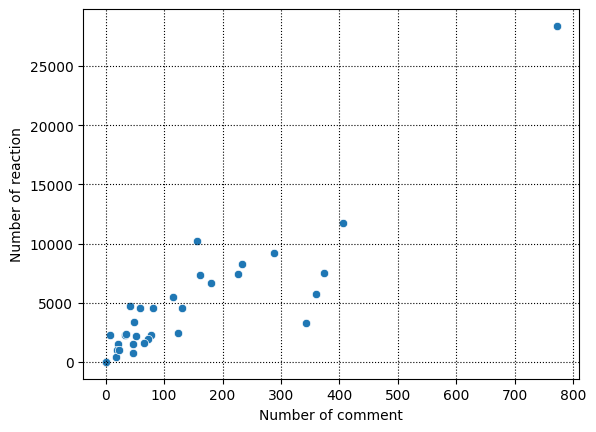

In [22]:
# Sự tương quan giữa số lượng reactions và số lượng comments 
sns.scatterplot(
    data = raw_df, 
    y = 'reaction_count',
    x = 'comments'
)
plt.ylabel('Number of reaction')
plt.xlabel('Number of comment')
plt.grid(True, ls = ':', color = 'black')
plt.show()